# Deppisch et al, 1993
Fixes some problems in MacGregor and Oliver

In [95]:
from brian2 import *
%matplotlib inline
rcParams['figure.figsize'] = [8.0, 6.0]

In [201]:
# This shows me that E is only above theta for one timestep
# But it's not always so.
where(M.o==1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 171,  392,  614,  836, 1058, 1280, 1502, 1724, 1946, 2168]))

In [329]:
def plotdepp_SC(M, SC):
    # ax1 = subplot(311, frameon=False)
    gs = GridSpec(3, 1, height_ratios = [5, 1, 2])
    ax1 = subplot(gs[0]) # , frameon=False)
    plot(M.t/ms, M.E[0], label='E')
    plot(M.t/ms, M.theta[0], label='theta')
    #plot(M.t/ms, M.iSC[0], label='iSC')
    axhline(SC, ls='--', c='k', label='SC={}'.format(SC))
    setp(ax1.get_xticklabels(), visible=False)
    ylabel('E, theta, in')
    legend()

    # ax3 = subplot(313, sharex = ax1, frameon=False)
    ax3 = subplot(gs[1], sharex = ax1) #, frameon=False)
    plot(M.t/ms, M.o[0], label='o')
    setp(ax3.get_xticklabels(), visible=False)
    ylabel('o')

    # plot(M.t/ms, M.G_e[0], label='G_e')
    # ax2 = subplot(312, sharex = ax1, frameon=False)
    ax2 = subplot(gs[2], sharex = ax1) # , frameon=False)
    plot(M.t/ms, M.g_K[0], label='g_K')
    ylabel('g_K')
    xlabel('t [ms]');

# Success!

These really look like figs 2a and 2b

### Modifying b to make it like MacGregor where it really goes up that far.
(assuming E >= theta for ONLY ONE timestep)

Dramatically different results

### Constant input:

*I thought constant input is no good, but it just wasn't high enough.*

*And this even gives about the shown level of minimum E.*

This keeps E above threshold for 2 steps though.

### Fiddling with the trigger to try to make it a single time
Made a custom event.  Like a threshold, but was allowed to have it check previous value of the output, then run the code to set the output = 1.

In [366]:
eqs = '''
# Equation 1a
# SC = supplied current
# Should this be over a time constant? Yes!
dE/dt = (-(E - E_0) - (g_K - g_K_0) * (E - E_K) + SC - G_e * (E - E_ex) - G_i * (E-E_in))/tau_E + eta/tau_E**.5*xi : 1

# Equation 1b is for theta
# I don't know why it's written this way, but it is
dtheta/dt = (-(theta - theta_0) + c*(E - E_0))/tau_theta : 1

# Equation 1c: Potassium current
# orig: dg_K/dt = (-(g_K - g_K_0) + tau_g_K * b * S)/tau_g_K : 1
dg_K/dt = (-(g_K - g_K_0))/tau_g_K + b_step * o : 1

# Equation 1d: IS THIS RIGHT???
# if E>theta, then 1, else 0
# o = int(E>=theta) : 1 
o : 1

dG_e/dt = -G_e/tau_ex : 1
dG_e_pf_it/dt = -G_e_pf_it/tau_e_pf_it : 1
dG_i/dt = -G_i/tau_i : 1
'''

start_scope()

SC = 1.4

# A little hack to make output = 1 cycle long
G = NeuronGroup(1, eqs, method='euler', 
                events={'reseto': 'o==1', 
                        'seto': 'E >= theta and o < .5'})
G.theta = 1
G.E = E_0
G.run_on_event('reseto', 'o = 0')
G.run_on_event('seto', 'o = 1') 

M = StateMonitor(G, ('E', 'o', 'g_K', 'theta', 'G_e'), record=True)

eta = 0 # quiet!
c = 0.3

b = 4
RT = 1  # How many steps it takes E to go below threshold
b_step = b / (defaultclock.dt * RT)

net = Network(collect())
net.store()

Starting simulation at t=0. s for a duration of 230. ms
0.23 (100%) simulated in 2s


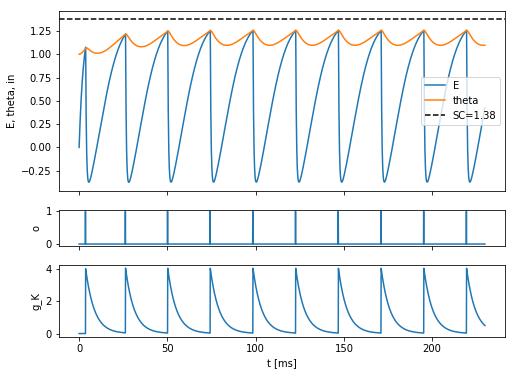

In [367]:
net.restore()
SC = 1.38
eta = 0

net.run(230*ms, report='stdout')

plotdepp_SC(M, SC)

Starting simulation at t=0. s for a duration of 230. ms
0.23 (100%) simulated in < 1s


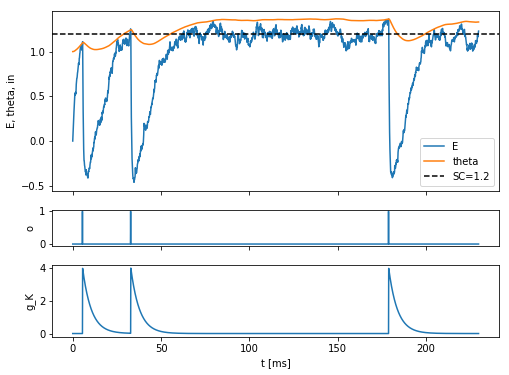

In [368]:
net.restore()
SC = 1.2
eta = 0.1

net.run(230*ms, report='stdout')

plotdepp_SC(M, SC)